# Public Response to a Federal State of Emergency: #FlintWaterCrisis

Studying microblog posts on `#FlintWaterCrisis` allows us to understand how citizens respond to a man-made disaster and to a governmental failure using observational data. In particular, we form and test hypotheses on attribution of responsibility and blame, an important topic in political science and public policy. In the words of Iyengar, "individuals tend to simplify political issues by reducing them to questions of responsibility and their issue opinions flow from their answers to these questions". And attributions formed in times of federal state of emergency are of particular importance because they make memories and are long used as concrete examples of severity of consequences of wrong policy decisions. Then how do citizens decide who was responsible for this man-made catastrophe especially when there are multiple sources of failures at all levels of government?

### Political Predispositions
Partisanship (in- and out-groups): social psychology and partisan bias plays role, blames go to the out-group
The city council is made up Democrats, the state of Michigan is ruled by a Republican governor, the Congress is controlled by Republicans, and the President is a Democrat.
#### Hypothesis #1
    a) People who are attributing blame to the Governor Snyder are less likely to blame the city council or the President or EPA, but they are more likely to blame the Congress.
    b) Similarly, people who are criticizing one Democratic actor are also likely to do so for other Democratic actors, while they are less likely to attribute blame to the Republican governor or the Congress.
    
### Environmental Vulnerability
Who are in more vulnerable environment attribute more blame to the authorities. This relates to homophily as well. The more vulnerable the more likely to tweet about #FlintWaterCrisis. So,  [relate to Geodemographics index of Singleton, and Social Vulnerability Index]
#### Hypothesis #2
    We expect most of the posts come out of Flint, followed by other cities in Michigan, and followed by other cities which have higher rates of minority and/or poor.

### Social Vulnerability
Individuals with less social support are more likely to blame the government.
#### Hypothesis #3
    Among the Flint residents, control for the friends/followers in attribution of blame.
    
### Political Knowledge, Media Coverage and Agenda-Setting
Politically more knowledgable individuals attribute blame to a wider range of actors. Only people who are aware of functional responsibilities of each actor can attribute blame to them rightfully. Examine weekly media coverage of Flint using Lexis-Nexis with blame words `blame, fault, responsible, fail` and plot how much they refer to national-, state- and local-level actors.
#### Hypothesis #4
    People who are blaiming a wide range of actors are expected to follow both the conservative and the liberal media.
#### Hypothesis #5
    Temporal aspects: term frequency.. Granger causality?


In [1]:
import json
import pandas as pd
from glob import glob
from collections import Counter
from datetime import date as dt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
#read in json files
tw = []
files = glob("data/TweetCollection/*.json")
for f in files:
    with open(f, 'r',encoding='utf-8') as fin:
        for line in fin:
            tw.append(json.loads(line))

In [3]:
#create a dataframe
df = pd.DataFrame(tw)[['id_str','created_at','text']]
df['created_at'] = pd.to_datetime(df.created_at)
del tw
df.head()

,id_str,created_at,text
0,688103460634415104,2016-01-15 21:00:24,RT @TheDailyShow: #FlintWaterCrisis could have...
1,688103392388882433,2016-01-15 21:00:07,You can thank the Republican party for this #M...
2,688103487205322752,2016-01-15 21:00:30,RT @TheDailyShow: #FlintWaterCrisis could have...
3,688103398462205952,2016-01-15 21:00:09,Snyder still won’t say when he knew about #Fli...
4,688103509611294721,2016-01-15 21:00:35,RT @TheDailyShow: #FlintWaterCrisis could have...


In [20]:
month = 
tweets = ' '.join(df[df.created_at.dt.month == month].text.tolist())
words = ' '.join([w for w in tweets.replace("\'s", '').split()
                  if not (('http' in w) or (w.startswith('@')) or (w in ('RT','via')))])

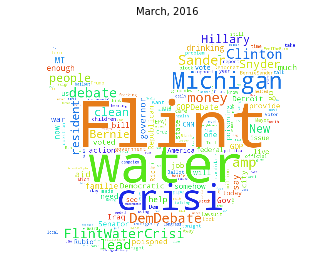

In [21]:
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
from PIL import Image
import numpy as np
import calendar
#mask = imread('twitter_mask.png', flatten=True)
mask = np.array(Image.open("twitter_mask.png"))
wc = WordCloud(mask=mask,background_color='white',stopwords=STOPWORDS,width=2200,height=1400).generate(words)
plt.figure().suptitle(calendar.month_name[month]+', 2016')
plt.axis('off')
plt.imshow(wc)
plt.savefig('figs/wc_'+calendar.month_name[month]+'.png', dpi=300, bbox_inches='tight')

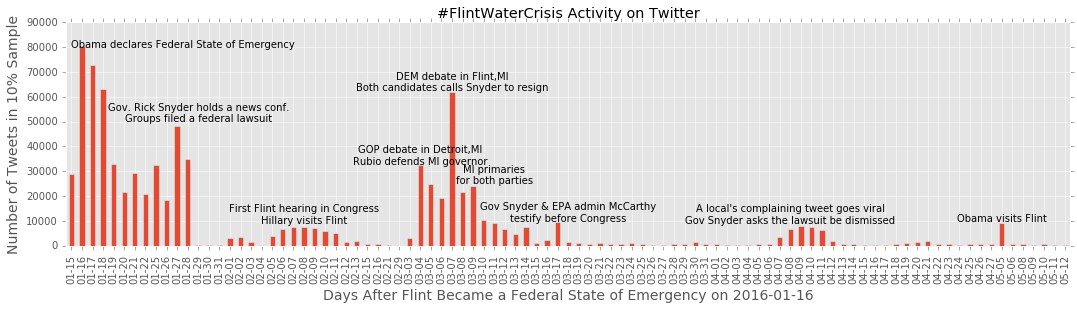

In [24]:
#plot daily activity
day = df.groupby(df.created_at.dt.strftime('%m-%d'))['id_str'].count()
ax = day.plot(kind="bar",figsize=(18, 4),title='#FlintWaterCrisis Activity on Twitter')
ax.set_xlabel('Days After Flint Became a Federal State of Emergency on 2016-01-16', fontsize=14)
ax.set_ylabel('Number of Tweets in 10% Sample', fontsize=14)
ax.annotate('Obama declares Federal State of Emergency', xy=(0, 80000))
ax.annotate('Gov. Rick Snyder holds a news conf.\n'\
            'Groups filed a federal lawsuit', xy=(12, 50000),ha='center')
ax.annotate('First Flint hearing in Congress\n'\
            'Hillary visits Flint', xy=(22, 9000),ha='center')
ax.annotate('GOP debate in Detroit,MI\nRubio defends MI governor', xy=(33, 33000),ha='center')
ax.annotate('DEM debate in Flint,MI\nBoth candidates calls Snyder to resign', xy=(36, 62500),ha='center')
ax.annotate('MI primaries\nfor both parties', xy=(40, 25000),ha='center')
ax.annotate('Gov Snyder & EPA admin McCarthy\ntestify before Congress', xy=(47, 10000),ha='center')
ax.annotate('A local\'s complaining tweet goes viral\nGov Snyder asks the lawsuit be dismissed', xy=(68, 9000),ha='center')
ax.annotate('Obama visits Flint', xy=(88, 10000),ha='center')
ax.get_figure().savefig('figs/daily.png',dpi=150,bbox_inches='tight')